Dataset Referance: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

Importing libraries and packages

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the csv file of the Dataset of Audi cars as pandas DataFrame¶

In [16]:
df = pd.read_csv("audi.csv")
display(df)

print("The first five rows of the data frame is:")
display(df.head(5))

print("The last five rows of the data frame is:")
display(df.tail(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4


The first five rows of the data frame is:


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


The last five rows of the data frame is:


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,47.9,1.4


Function to find the number of observations for unique value in a column of the Data Set

In [17]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [18]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')

In [19]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_count

Function to show the number of observations for each unique value in a column using a barplot

In [20]:
def barplot(data, column_x, color, rotation, yticks):
    
    # barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # title for the plot
    plt.title("Number of cars present for each " + column_x)
    
    # lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

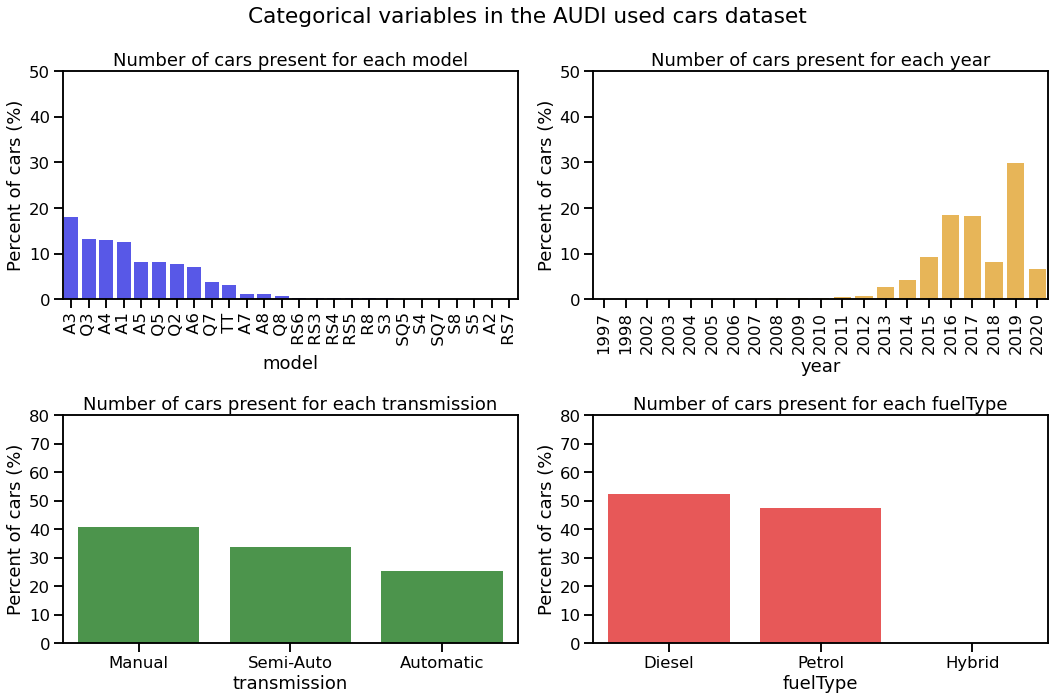

In [21]:
sns.set_context('talk')

plt.figure(figsize=(15,10))

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,90,10))

# row 2, column 2
plt.subplot(2,2,4)
barplot(fuelType_count, 'fuelType', 'red', 0, np.arange(0,90,10))

# title for all the plots
plt.suptitle("Categorical variables in the AUDI used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

Scatter Plot

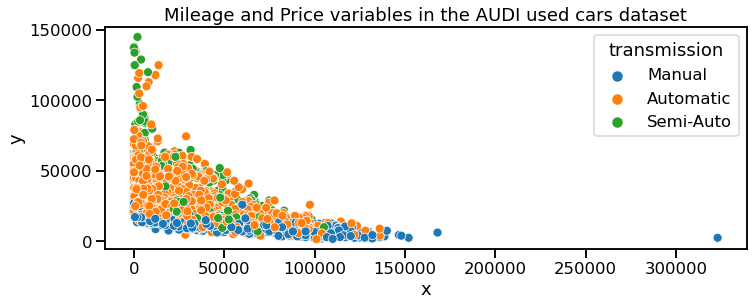

In [23]:
plt.figure(figsize=(20,12))

# mileage vs price
plt.subplot(3,2,1)
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission')

plt.xlabel('x')
plt.ylabel('y')

plt.title("Mileage and Price variables in the AUDI used cars dataset")

# rotate the xticks 
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

Histogram

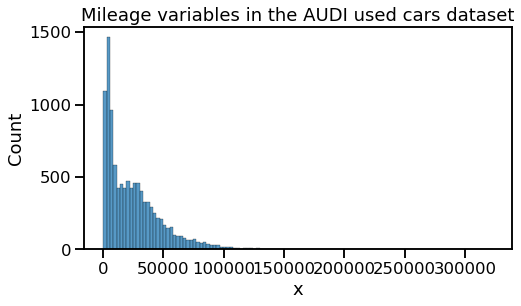

In [28]:
plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.histplot(data=df, x='mileage')
plt.title("Mileage variables in the AUDI used cars dataset")

plt.xlabel('x')

# rotate the xticks
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

Distribution Plot 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


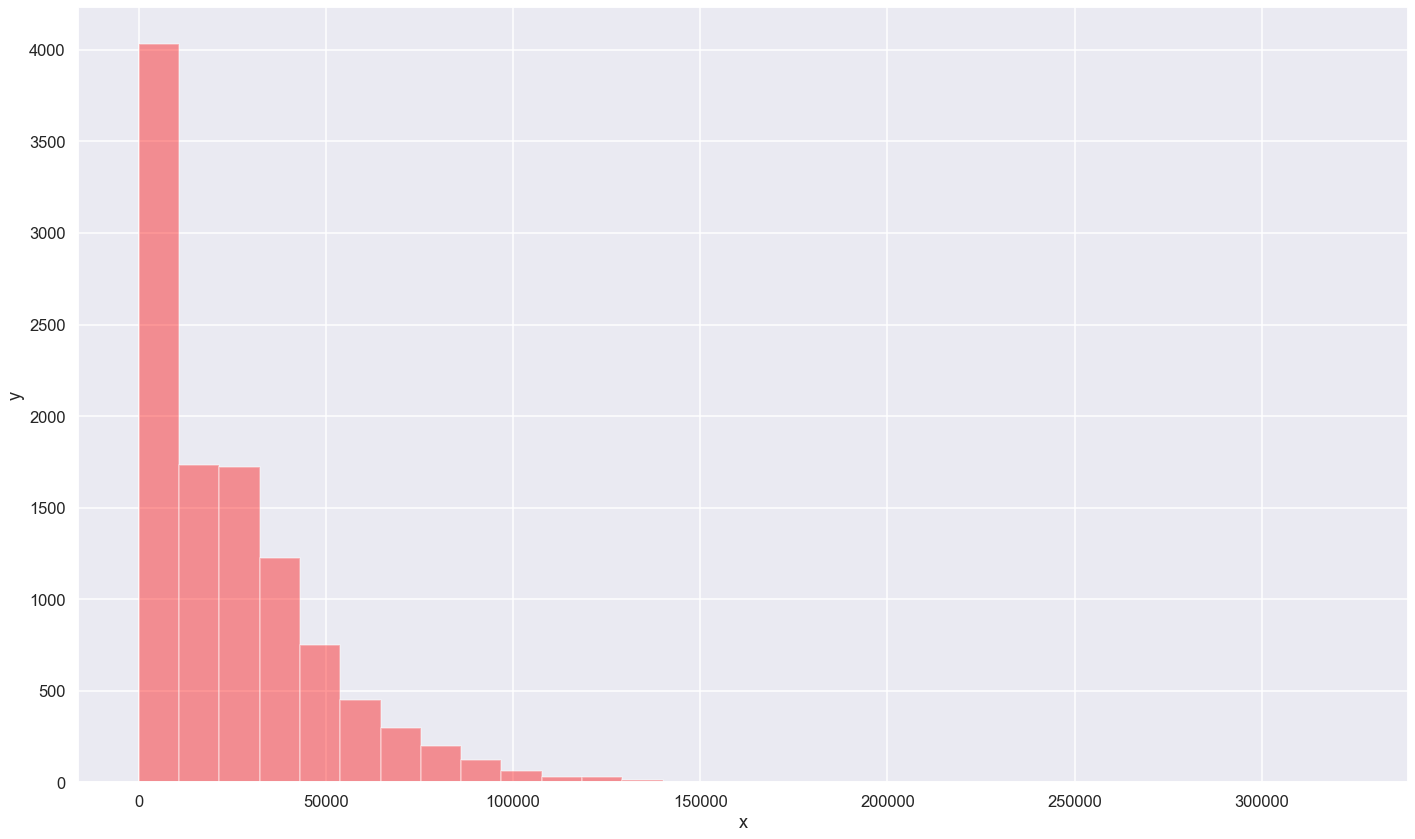

In [85]:
plt.figure(figsize=(20,12))

from warnings import filterwarnings
sns.distplot(df['mileage'], kde = False, color ='red', bins = 30)

plt.xlabel('x')
plt.ylabel('y')

# rotate the xticks
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()

ECDF Plot

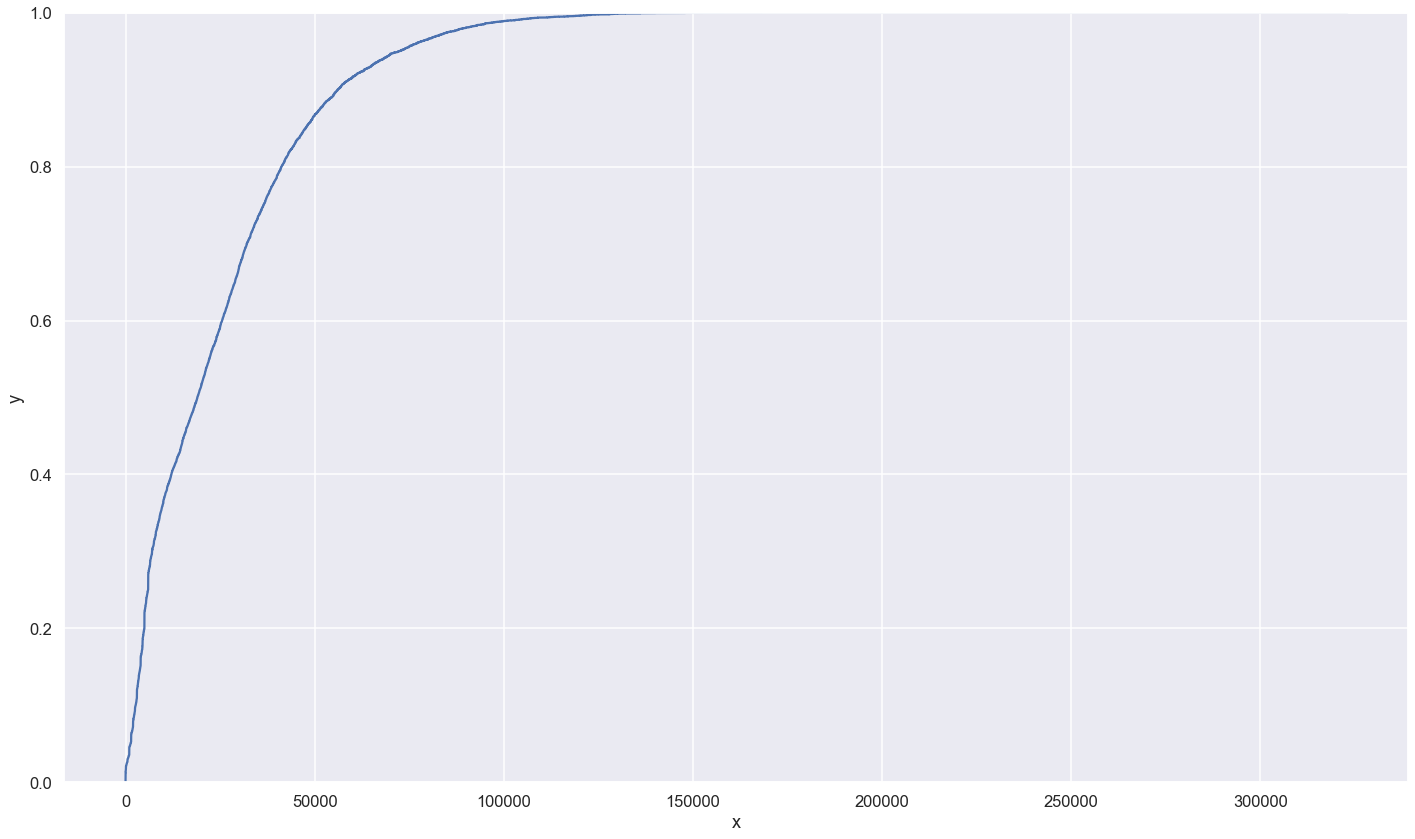

In [86]:
plt.figure(figsize=(20,12))

# making ECDF plot 
sns.ecdfplot(data=df,x='mileage')

plt.xlabel('x')
plt.ylabel('y')

# rotate the xticks
plt.xticks()
    
# provide a range for the yticks
plt.yticks()

plt.tight_layout()
plt.show()